In [1]:
import numpy as np
import random
import itertools
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
%matplotlib inline

In [3]:
def f_q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2
    z = w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
    return w, x, y, z

def f_q_xy_mult(x, y):
    w1 = scxy[1][x]
    x1 = scxy[0][x]
    w2 = scxy[1][y]
    y2 = scxy[0][y]
    w = w1 * w2
    x = x1 * w2
    y = w1 * y2
    z = x1 * y2
    return w, x, y, z

def f_q_xz_mult(x, z): # FLAG
    w1 = scxy[1][x]
    x1 = scxy[0][x]
    w2 = scz[1][z]
    z2 = scz[0][z]
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2
    z = w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
    return w, x, y, z

def f_q_yx_mult(y, x):
    w1 = scxy[1][y]
    y1 = scxy[0][y]
    w2 = scxy[1][x]
    x2 = scxy[0][x]
    w = w1 * w2
    x = w1 * x2
    y = y1 * w2
    z = -(y1 * x2)
    return w, x, y, z

def f_q_yz_mult(y, z): # FLAG
    w1 = scxy[1][y]
    x1 = scxy[0][y]
    w2 = scz[1][z]
    z2 = scz[0][z]
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2
    z = w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
    return w, x, y, z

def f_q_zx_mult(z, x): # FLAG
    w1 = scz[1][z]
    z1 = scz[0][z]
    w2 = scxy[1][x]
    x2 = scxy[0][x]
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2
    z = w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
    return w, x, y, z

def f_q_zy_mult(z, y): # FLAG
    w1 = scz[1][z]
    z1 = scz[0][z]
    w2 = scxy[1][y]
    y2 = scxy[0][y]
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2
    z = w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
    return w, x, y, z

def f__qv_mult(q1, q2):
    w1, x1, y1, z1 = q1
    x2, y2, z2 = q2
    w = -(x1 * x2) - y1 * y2 - z1 * z2
    x = w1 * x2 + y1 * z2 - z1 * y2
    y = w1 * y2 - x1 * z2 + z1 * x2
    z = w1 * z2 + x1 * y2 - y1 * x2
    return w, x, y, z

def f_q_conjugate(q):
    w, x, y, z = q
    return (w, -x, -y, -z)

def f_qv_mult(q1, v1):
    q2 = v1 # (0.0,) + v1
    return f_q_mult(f__qv_mult(q1, q2), f_q_conjugate(q1))[1:]


In [4]:
def o_q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 - x1 * z2 + y1 * w2 + z1 * x2
    z = w1 * z2 + x1 * y2 - y1 * x2 + z1 * w2
    return w, x, y, z

def o_q_xy_mult(x, y):
    w1 = cosx[x]
    x1 = sinx[x]
    w2 = cosy[y]
    y2 = siny[y]
    w = w1 * w2
    x = x1 * w2
    y = w1 * y2
    z = x1 * y2
    return w, x, y, z

def o_q_yx_mult(y, x):
    w1 = cosy[y]
    y1 = siny[y]
    w2 = cosx[x]
    x2 = sinx[x]
    w = w1 * w2
    x = w1 * x2
    y = y1 * w2
    z = -(y1 * x2)
    return w, x, y, z

def o__qv_mult(q1, q2):
    w1, x1, y1, z1 = q1
    x2, y2, z2 = q2
    w = x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + y1 * z2 - z1 * y2
    y = w1 * y2 + z1 * x2 - x1 * z2
    z = w1 * z2 + x1 * y2 - y1 * x2
    return w, x, y, z

def o_q_conjugate(q):
    w, x, y, z = q
    return (w, -x, -y, -z)

def o_qv_mult(q1, v1):
    q2 = v1 # (0.0,) + v1
    return o_q_mult(o__qv_mult(q1, q2), o_q_conjugate(q1))[1:]

def o_axisangle_to_q(v, theta, tlst):
    v = o_normalize(v)
    x, y, z = v
    
    w = tlst[1][theta]
    x = x * tlst[0][theta]
    y = y * tlst[0][theta]
    z = z * tlst[0][theta]
    return w, x, y, z

def o_normalize(v, tolerance=0.00001):
    mag2 = sum(n * n for n in v)
    if abs(mag2 - 1.0) > tolerance:
        print('normalize')
        mag = sqrt(mag2)
        v = tuple(n / mag for n in v)
    return v

In [5]:
rez = 50
showbox = lambda n: np.ndindex((n*4+1, n*2+1, n*2+1)) # ORDER: z, y, x
sb = showbox(rez)
zine = lambda y: tuple([np.sin((np.pi/2.)*(x/(2*y))) for x in range(2*y+1)])
zi = zine(rez)
zi = zi[1:(len(zi) -1)//2], zi[(len(zi)-1)//2+1:len(zi)-1]
lst = (zi[0], zi[1], tuple(reversed(zi[1])), tuple(reversed(zi[0])), tuple([-i for i in zi[0]]), tuple([-i for i in zi[1]]), tuple([-i for i in reversed(zi[1])]), tuple([-i for i in reversed(zi[0])]))
[len(i) for i in lst]
sinx = (.5**.5,) + lst[3] + (0.,) + lst[4] + (-.5**.5,)
cosx = (.5**.5,) + lst[1] + (1.,) + lst[2] + (.5**.5,)
siny = (.5**.5,) + lst[3] + (0.,) + lst[4] + (-.5**.5,)
cosy = (.5**.5,) + lst[1] + (1.,) + lst[2] + (.5**.5,)
sinz = (1.,) + lst[2] + (.5**.5,) + lst[3] + (0.,) + lst[4] + (-.5**.5,) + lst[5] + (-1.,)
cosz = (0.,) + lst[0] + (.5**.5,) + lst[1] + (1.,) + lst[2] + (.5**.5,) + lst[3] + (0.,)

In [6]:
scxy = (sinx, cosx)
scz  = (sinz, cosz)

In [7]:
sb = tuple(sb)

In [8]:
fsbz = []
for i in sb:
    # fx = f_axisangle_to_q((0.,1.,0.), i[2], scxy)
    # fy = f_axisangle_to_q((1.,0.,0.), i[1], scxy)
    fyx = f_q_yx_mult(i[2], i[1])
    faxis = f_qv_mult(fyx, (0.,0.,-1.))
    fz = o_axisangle_to_q(faxis, i[0], scz)
    fsbz.append(fz)

In [9]:
def guess(quat, rpoints, apoints):
    # given guess axis, guess rotation, original points, & trans/rot points return result
    ur_points = [f_qv_mult(quat, r) for r in rpoints]
    zebra = zip(apoints, ur_points)
    crosses0 = list(map(lambda x: np.cross(x[0], x[1]), zebra))
    crosses1 = krizkroz(crosses0)
    zins = sinusoids(crosses1)
    
    return sum(zins)

In [10]:
def threes(x=1):
    tmp = []
    for i in range(x):
        tmp.append(np.array([random.random(), random.random(), random.random()]))
    return tmp

In [11]:
points = threes(8)

In [12]:
cam_a = threes()[0]

In [13]:
cam_b = threes()[0]

In [14]:
a_points = cam_a - points

In [15]:
b_points = cam_b - points

In [16]:
quaternion = (lambda x: (f_q_conjugate(fsbz[x]), x))(int(random.random() * len(fsbz)))

In [17]:
br_points = [f_q_mult(f_q_mult(quaternion[0], (0.,)+tuple(p)), fsbz[quaternion[1]])[1:] for p in b_points]

In [18]:
def krizkroz(x):
    tmp0 = []
    tmp1 = list(itertools.combinations(range(len(x)), 2))
    for i, j in tmp1:
        tmp0.append(np.cross(x[i], x[j]))
    return tmp0

In [19]:
def sinusoids(x):
    tmp0 = []
    tmp1 = list(itertools.combinations(range(len(x)), 2))
    for i, j in tmp1:
        tmp0.append(abs(np.sin(angle_between(x[i], x[j]))))
    return tmp0

In [20]:
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [21]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [22]:
i = 0
l = len(fsbz)

gs = []
for j in fsbz:
    gs.append(guess(
        j, 
        [br_points[k] for k in range(len(br_points)) if k in (7, 5, 3)], 
        [a_points[k]  for k in range(len(a_points )) if k in (7, 5, 3)]
    ))
    i += 1

In [23]:
mn = min(gs)

In [24]:
mx = max(gs)

In [25]:
imgs = [(i-mn)/mx for i in gs]

In [27]:
imagelist = np.array(imgs).reshape((201, 101, 101))

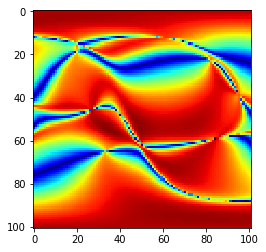

In [28]:
fig = plt.figure()

im = plt.imshow(imagelist[0], cmap=plt.get_cmap('jet'), vmin=0, vmax=1)

def updatefig(j):
    im.set_array(imagelist[j])
    return [im]

ani = animation.FuncAnimation(
    fig, 
    updatefig, 
    frames=range(200), 
    interval=20, 
    blit=True
)


In [29]:
HTML(ani.to_html5_video())

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# videos of rotational data sets

## rotation_data_set_000:

[![rotation_data_set_000](https://i.ytimg.com/vi/Da5D3tut7YU/hqdefault.jpg)](https://www.youtube.com/watch?v=Da5D3tut7YU)

## rotation_data_set_001:

[![rotation_data_set_001](https://i.ytimg.com/vi/87UHDPZ3UnM/hqdefault.jpg)](https://www.youtube.com/watch?v=87UHDPZ3UnM)

## rotation_data_set_002:

[![rotation_data_set_002](https://i.ytimg.com/vi/8VI-efCAFv0/hqdefault.jpg)](https://www.youtube.com/watch?v=8VI-efCAFv0)